# Emulation

In [2]:
import numpy as np

import numpy as np 

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.gaussian_process.kernels import Matern, WhiteKernel

np.random.seed(1)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set(color_codes = True)



In [1]:
# Let's define our system of interest
def FEM_Model_gable_roof(x):
    ## FEM_MODEL_gable_roof
    # creates a scalar valued damage estimate with range [0, Inf]
    # from a four dimensional input space
    ## x[:,0] = building aspect ratio (height / width): unitless.  Range [0, 2]
    ## x[:,1] = wind speed : miles per hour.  Range [0, 300]
    ## x[:,2] = wind angle : radians.  Range [0, pi/2]
    ## x[:,3] = design_speed : mile per hour. Range [0, 300]
    adjustment_factor = 1
    return np.cos(x[:,2])*x[:,1]*x[:,1]*x[:,0]/(adjustment_factor*x[:,3]*x[:,3])

## Regression or Interpolation-Based Models

### Algebraic Models

#### Quadratic Response Surface Model

In this section, we will construct a quadratic emulator of the form:
$\tilde{f}(q, \beta) = \beta_0 + \sum_{i = 1}^p \beta_i q_i + \sum_{i = 1}^p \beta_{ii} q_i^2 + \sum_{i = 1}^p\sum_{j > i}^p \beta_{ij}q_iq_j$

Since there are $P = \frac{(p + 1)(p +2)}{2}$ coefficients, we need $M > P$ samples from our high-fidelity simulation code or experimental measurements.  From linear regression theory, the reast squares estimate is

$\beta = [X^TX]^{-1}X^Ty_s$

#### Kriging Model

Issues associated with Gaussian process or kriging representations include ill-conditioning of $\mathcal{R}$, exponential growth in the number of hyperparameters for large parameter dimensions $p$, multiple local maximum, and ridges near maximum values.

In [51]:
import time
nPoints = 100
training_input = np.zeros([nPoints, 4])
training_input[:, 0] = np.random.uniform(low = 0, high = 2, size = nPoints)
training_input[:, 1] = np.random.uniform(low = 0, high = 300, size = nPoints)
training_input[:, 2] = np.random.uniform(low = 0,  high = np.pi/2, size = nPoints)
training_input[:, 3] = np.random.uniform(low = 0,  high = 300, size = nPoints)

training_out = FEM_Model_gable_roof(training_input)

len_scale = [0.5, 300, 0.5, 300]


kernel = ConstantKernel() + RBF(length_scale = len_scale) + WhiteKernel(noise_level=0.01)

gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = 1000)

print("initial params")
params = gp.get_params()
print(params)

print('Training')
t = time.time()
gp = gp.fit(training_input, training_out)
elapsed = time.time() - t
print(elapsed)

score = gp.score(training_input, training_out)
print(score)

print("learned kernel params")
print(gp.kernel_.get_params())

initial params
{'alpha': 1e-10, 'copy_X_train': True, 'kernel__k1': 1**2 + RBF(length_scale=[0.5, 300, 0.5, 300]), 'kernel__k2': WhiteKernel(noise_level=0.01), 'kernel__k1__k1': 1**2, 'kernel__k1__k2': RBF(length_scale=[0.5, 300, 0.5, 300]), 'kernel__k1__k1__constant_value': 1.0, 'kernel__k1__k1__constant_value_bounds': (1e-05, 100000.0), 'kernel__k1__k2__length_scale': [0.5, 300, 0.5, 300], 'kernel__k1__k2__length_scale_bounds': (1e-05, 100000.0), 'kernel__k2__noise_level': 0.01, 'kernel__k2__noise_level_bounds': (1e-05, 100000.0), 'kernel': 1**2 + RBF(length_scale=[0.5, 300, 0.5, 300]) + WhiteKernel(noise_level=0.01), 'n_restarts_optimizer': 1000, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': None}
Training
29.089340209960938
-0.0014461747532314997
learned kernel params
{'k1': 44.9**2 + RBF(length_scale=[625, 156, 2.72, 30.5]), 'k2': WhiteKernel(noise_level=1e+05), 'k1__k1': 44.9**2, 'k1__k2': RBF(length_scale=[625, 156, 2.72, 30.5]), 'k1__k1__constant_value': 2

<ErrorbarContainer object of 3 artists>

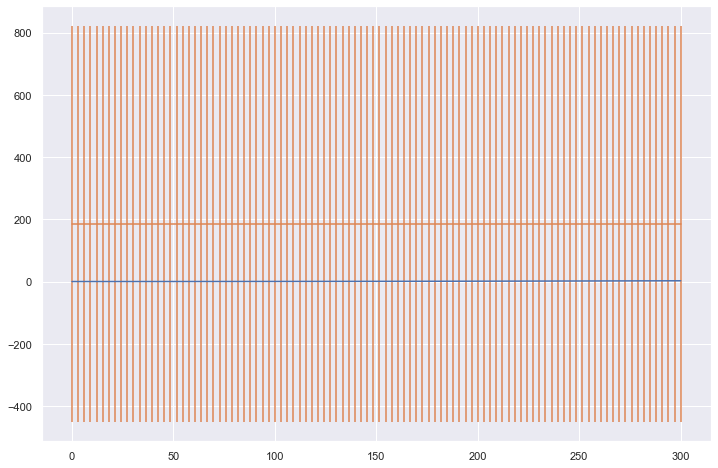

In [50]:
test_set = np.zeros([nPoints, 4])
test_set[:,0] = 1.
test_set[:,1] = np.linspace(0, 300, num = nPoints)
test_set[:,2] = np.pi/4.
test_set[:,3] = 160

actual_output = FEM_Model_gable_roof(test_set)

approx_output, approx_err = gp.predict(test_set, return_std = True)

plt.figure(figsize = [12, 8])
plt.plot(test_set[:,1], actual_output)
plt.errorbar(test_set[:,1], approx_output, yerr = approx_err*2.)

### Evolutionary PDEs

## Projection-Based Models

### Initial Conditions

### Reduced-Order States and Snapshot Sets

## Eigenfunction or Modal Expansions

## Snapshot-Based Methods including POD

### POD with Distributed Observations

### POD with Discrete Observations

## High-Dimensional Model Representation (HMDR) Techniques

### ANOVA-HDMR

### RS-HDMR

### Cut-HDMR

### ANOVA-HDMR Based on Cut-HDMR Expansions

## Surrogate-Based Bayesian Model Calibration